# CalTable Guideline
`Update: 2024-11-04`

Calculate Table (`CalTable`) is a robust computational tool designed for interdisciplinary data processing, enabling users to perform calculations with the simplicity of a Pandas DataFrame interface. By connecting seamlessly with EasyAPI, CalTable allows users from various fields to easily manipulate and analyze their data, making complex computations accessible without requiring specialized programming knowledge.

## Installation
There are two options:
1. If you are at Tulane Campus (uptown or downtown), you could install the package from our Jellyroll Python Pakcage Index (JPIP) follow command:  
   `pip install -U caltable --index-url https://jellyroll.cs.tulane.edu/pypi/simple/`  
   and  
   `pip install -U caltable-bio --index-url https://jellyroll.cs.tulane.edu/pypi/simple/`(Bio visualization support)  
   (Just make sure you connected to WIFI `tulane` or `eduroam`)
2. For off-campus, please install using the attached file:
   `pip install caltable-1.0.1.zip`

## Basic Tutorial
**This section aims to let you learn how to use CalTable easily. For more customization function, please check the next section, advanced tutorial**

Now, let's try the simplest way to use CalTable to compute APL. 

In [1]:
# import caltable if you have successfully installed it.
import caltable as ct
from pathlib import Path

Before, we start the tutorial, I'd like to provide the shortest code to run code on a folder of PDB files and visualize the result.

In [2]:
workbench = ct.WorkBench.load('apl.workbench.json') # Load work desk
table = ct.DataTable([{'path':str(file)} for file in Path('./data').glob('*.pdb') ]) # Create path table with PDB files from `./data` folder
table = workbench['apl'](table) # Read PDB, select chain A, and compute COREX.
table

[0.5s] ✓ Task APL Result Aggregator Finished.cessing Likelihood Finished.rs Finished.

,path,pdb_id,pdb,corex,sasa,bfactor,sequence,alignment,sequence_entropy,residue_likelihood,apl_aggregate,peptides,regular_peptides,peptide_likelihood,apl_table
0,data\5jhw.pdb,5jhw,PDB:885 lines,"COREX (ln(kf)) Values:[-10.76504924339339, -10...","SASA Values:[1.3160278728943418, 0.77842180516...","B-Factor Values:[77.93, 65.02, 61.81]...(109)",Protein Amio Acid Sequence:NLGLDCDEHSSESRCC......,FASTA Sequence:>UniRef50_K7F502...(64300),"Sequence Entropy Values:[0.6059239568702086, 0...",Residue Antigen Processing Likelihood:[0.59306...,Residue Level Aggregated Score:[0.296534632277...,Protein Sequence Sliced Peptides:NLGLDCDEHSSES...,Protein Sequence Regulared Sliced Peptides:{\n...,Peptide Antigen Processing Likelihood:[0.21887...,"Aggregated APL Table:{\n ""B-Factor"": ...(17952)"
1,data\6dcm.pdb,6dcm,PDB:713 lines,"COREX (ln(kf)) Values:[-2.2563333489448367, -2...","SASA Values:[0.8308742555692028, 0.62522670561...","B-Factor Values:[26.16, 15.78, 10.4]...(85)",Protein Amio Acid Sequence:EFSEECMHGSGENYDG......,FASTA Sequence:>UniRef50_A0A8C0...(51618),"Sequence Entropy Values:[0.5993541463165911, 1...","Residue Antigen Processing Likelihood:[0.0, 0....",Residue Level Aggregated Score:[-1.08535593609...,Protein Sequence Sliced Peptides:EFSEECMHGSGEN...,Protein Sequence Regulared Sliced Peptides:{\n...,"Peptide Antigen Processing Likelihood:[0.0, 0....","Aggregated APL Table:{\n ""B-Factor"": ...(13782)"


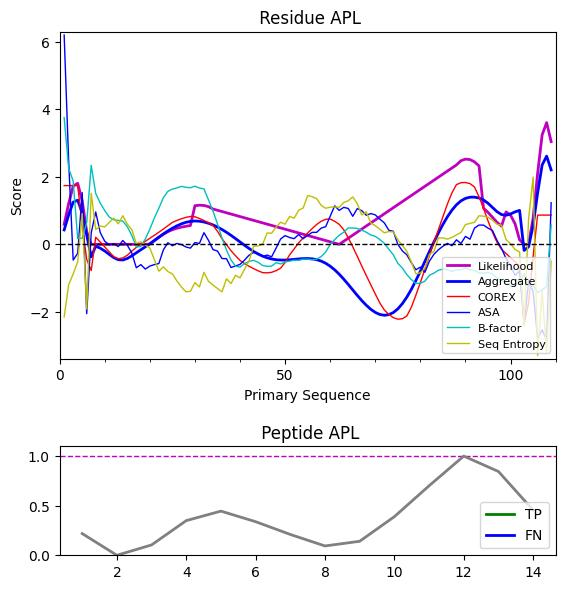

In [3]:
table[0, 'apl_table']

**REAL TUTORIAL Beginning**  
First step, please load the WorkBench, which is a `*.workbench.json` file.  
Work Bench is a top level object for caltable.  
It is like a desk with all tools placed on it.  
To save the time and simplify the configuration procedure, we have prepared some working desk with possible useful tools for you.  
These desks are stored in file such as `*.workbench.json`.  
So, please load them to use the prepared working desk.

In [4]:
# Load the workbench
# You could replace the file path to other workbench file
workbench = ct.WorkBench.load('apl.workbench.json')
# Then, let's visualize the desk.  
# The `LibIndex` shows all `toolbox` on this desk.  
# There are typically two toolboxs including `local` and `Jellyroll Bioinformatics`. (Later `AWS` maybe here)
# Each toolbox listed all tools inside.
# For example, `local` toolbox has tools to enable you read PDB files (`read-file`) and sheet files (`read-sheet`)
# The COREX tool only provided by a remote server `Jellyroll` in our lab.
# The `workflows` shows some working procedure, protocal, or what you like call it.
# Each workflow is a sequential combination of a set of tools to appoach the calculation target.
workbench

# APL WorkBench (2.0)  
Provide a set of tools and workflows for APL computations  
## Workflows  
- **apl**: **APL**: Run APL for local PDB files.  
- **apl_mhc**: **APL-MHC**: Run APL, MHC, and aggregate them for local PDB files.  
## LibIndex  
`3 libs` `21 Algorithms`

  
### local  
- **read_file**: Read local files from the given path.  
- **read_sheet**: Read local sheet file and attach to the table.  


  
### {'server': 'jellyroll', 'id': '7Yumywbd'}  
- **combine_apl_mhc**: Combine APL and MHC values use a given weight.  
- **apl_aggregate**: Aggregate BFactor, SASA, COREX, Sequenc Entropy, and APL together to be an intigrated table.  
- **apl_peptide**: Calculate peptide level APL based on given residue APL and Peptides.  
- **apl_residue**: Calculate residue level APL by Sequence Entropy, B-Factor, SASA, and COREX.  
- **apl_mhc_aggregate**: Aggregate APL, MHC, and APL-MHC combined result together to be an intigrated table.  
- **bfactor**: Extract residue level B-Factor from the given PDB file (The B-Factor of CA atom).  
- **blast**: BLAST a provided protein sequence and return a FASTA formatted result.  
- **build_mers**: Build peptides with given mer size and hop.  
- **get_pdb**: Get PDB file by PDB ID.  
- **get_sequence**: Extract the amio acid sequence of the given protein.  
- **list_chain**: List all chains from the given PDB file.  
- **mhcii**: Use IEDB to predict the MHC-II binding.  
- **mmcif_to_pdb**: Convert mmCIF file to PDB file.  
- **regular_mers**: Build peptides with given mer size and hop.  
- **sasa**: Calculate the solvent accessible surface area for the given protein.
The results will be an array concatenated by the order of sorted(chains).  
- **select_chain**: Select destinated chains from the given PDB file.  
- **sequence_entropy**: Compute sequence entropy for the given sequence and BLAST outputs.  


  
### {'server': 'aws_t4', 'id': '7Yumywbd'}  
- **corex**: An algorithm designed to compute comformational stability of a protein. The results will be an array concatenated by the order of sorted(chains)  
- **get_pdb**: Get PDB file by PDB ID.  


  
  


Now, our working desk is ready. Let's prepare the material (the data)

In [5]:
# This function allows to build a data table from a folder of PDB files
# You could use this function to load any folder of PDB files you want.
# Here, the example is folder `data`
def build_table_with_pdb(path):
    pdb_files = [{'path':str(file)}
                for file in Path(path).glob('*.pdb')
                if file.is_file()]
    return ct.DataTable(pdb_files)
table = build_table_with_pdb('data')
table

,path
0,data\5jhw.pdb
1,data\6dcm.pdb


DataTable is the DataFrame of CalTable.  
All inputs and outputs will be stored in a data table.  
What `build_table_with_pdb` do, is just create a list of dictionary with key to be `path` and value to be the path to the pdb file.  
The inputs of the workflow or tool mean CalTable will check whether there is a column named this in the Data Table.  
If there is match one, it will use this column as the input for this paramter.
The outputs of the workflow or tool mean CalTable will store back a data with the format defined to the column named as output name.  

Now, we could start to use the `apl` to compute APL for the PDB file:

In [9]:
# Directly call this workflow with the table
# The PDB read and chain selection will happen on your computer
# The APL will happen on the remote server
table = workbench['apl'](table)
# The result now has been written to the table
table

[0.4s] ✓ Task APL Result Aggregator Finished.cessing Likelihood Finished.rs Finished.

,path,pdb_id,pdb,corex,sasa,bfactor,sequence,alignment,sequence_entropy,residue_likelihood,apl_aggregate,peptides,regular_peptides,peptide_likelihood,apl_table
0,data\5jhw.pdb,5jhw,PDB:885 lines,"COREX (ln(kf)) Values:[-10.76504924339339, -10...","SASA Values:[1.3160278728943418, 0.77842180516...","B-Factor Values:[77.93, 65.02, 61.81]...(109)",Protein Amio Acid Sequence:NLGLDCDEHSSESRCC......,FASTA Sequence:>UniRef50_K7F502...(64300),"Sequence Entropy Values:[0.6059239568702086, 0...",Residue Antigen Processing Likelihood:[0.59306...,Residue Level Aggregated Score:[0.296534632277...,Protein Sequence Sliced Peptides:NLGLDCDEHSSES...,Protein Sequence Regulared Sliced Peptides:{\n...,Peptide Antigen Processing Likelihood:[0.21887...,"Aggregated APL Table:{\n ""B-Factor"": ...(17952)"
1,data\6dcm.pdb,6dcm,PDB:713 lines,"COREX (ln(kf)) Values:[-2.2563333489448367, -2...","SASA Values:[0.8308742555692028, 0.62522670561...","B-Factor Values:[26.16, 15.78, 10.4]...(85)",Protein Amio Acid Sequence:EFSEECMHGSGENYDG......,FASTA Sequence:>UniRef50_A0A8C0...(51618),"Sequence Entropy Values:[0.5993541463165911, 1...","Residue Antigen Processing Likelihood:[0.0, 0....",Residue Level Aggregated Score:[-1.08535593609...,Protein Sequence Sliced Peptides:EFSEECMHGSGEN...,Protein Sequence Regulared Sliced Peptides:{\n...,"Peptide Antigen Processing Likelihood:[0.0, 0....","Aggregated APL Table:{\n ""B-Factor"": ...(13782)"


Now, let is visualize the results and fetch the values.

In [10]:
# The CalTable will automatically infer the data type and find the best way to visualize it.
# For example:
table[0, 'pdb'] # Index row:0 and column:pdb

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>10</th>
      <th>11</th>
      <th>12</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ATOM</td>
      <td>1</td>
      <td>N</td>
      <td>ASN</td>
      <td>A</td>
      <td>1</td>
      <td>9.924</td>
      <td>-10.193</td>
      <td>-28.480</td>
      <td>1.00</td>
      <td>76.22</td>
      <td>N</td>
      <td></td>
    </tr>
    <tr>
      <th>1</th>
      <td>ATOM</td>
      <td>2</td>
      <td>CA</td>
      <td>ASN</td>
      <td>A</td>
      <td>1</td>
      <td>9.784</td>
      <td>-10.503</td>
      <td>-27.062</td>
      <td>1.00</td>
      <td>77.93</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>2</th>
      <td>ATOM</td>
      <td>3</td>
      <td>C</td>
      <td>ASN</td>
      <td>A</td>
      <td>1</td>
      <td>11.117</td>
      <td>-10.944</td>
      <td>-26.469</td>
      <td>1.00</td>
      <td>71.18</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>3</th>
      <td>ATOM</td>
      <td>4</td>
      <td>O</td>
      <td>ASN</td>
      <td>A</td>
      <td>1</td>
      <td>11.528</td>
      <td>-10.459</td>
      <td>-25.413</td>
      <td>1.00</td>
      <td>67.74</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>4</th>
      <td>ATOM</td>
      <td>5</td>
      <td>CB</td>
      <td>ASN</td>
      <td>A</td>
      <td>1</td>
      <td>8.717</td>
      <td>-11.582</td>
      <td>-26.835</td>
      <td>1.00</td>
      <td>82.84</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>880</th>
      <td>ATOM</td>
      <td>881</td>
      <td>C</td>
      <td>SER</td>
      <td>A</td>
      <td>109</td>
      <td>28.317</td>
      <td>-15.125</td>
      <td>-29.585</td>
      <td>1.00</td>
      <td>57.22</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>881</th>
      <td>ATOM</td>
      <td>882</td>
      <td>O</td>
      <td>SER</td>
      <td>A</td>
      <td>109</td>
      <td>28.995</td>
      <td>-14.318</td>
      <td>-30.225</td>
      <td>1.00</td>
      <td>50.38</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>882</th>
      <td>ATOM</td>
      <td>883</td>
      <td>CB</td>
      <td>SER</td>
      <td>A</td>
      <td>109</td>
      <td>26.241</td>
      <td>-15.628</td>
      <td>-30.882</td>
      <td>1.00</td>
      <td>49.60</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>883</th>
      <td>ATOM</td>
      <td>884</td>
      <td>OG</td>
      <td>SER</td>
      <td>A</td>
      <td>109</td>
      <td>24.834</td>
      <td>-15.497</td>
      <td>-30.924</td>
      <td>1.00</td>
      <td>59.39</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>884</th>
      <td>ATOM</td>
      <td>885</td>
      <td>OXT</td>
      <td>SER</td>
      <td>A</td>
      <td>109</td>
      <td>28.899</td>
      <td>-15.995</td>
      <td>-28.934</td>
      <td>1.00</td>
      <td>63.22</td>
      <td>O</td>
      <td></td>
    </tr>
  </tbody>
</table>
<p>885 rows × 13 columns</p>
</div>

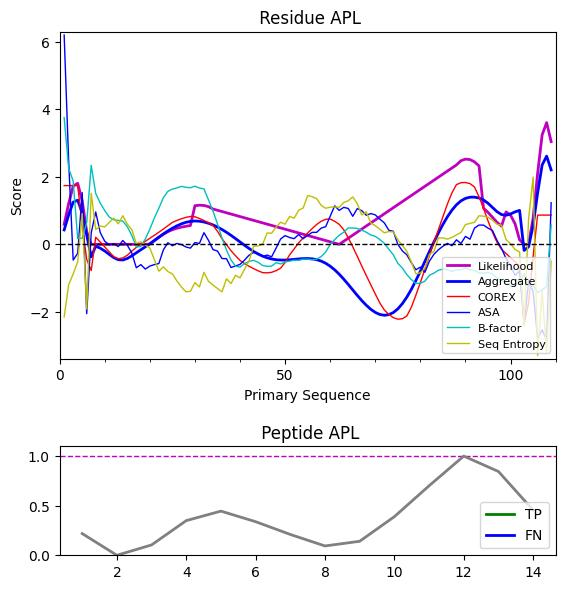

In [12]:
# one more example
table[0, 'apl_table'] # Index row:0 and column:apl_table

In [18]:
# Get the values of residue_likelihood (residue APL) as a python list
table[0, 'residue_likelihood'].value

[0.5930692645545103,
 1.2079989357471503,
 1.724846352582097,
 1.8071391696891632,
 1.2862814327533885,
 0.3792615528275848,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005472007494059456,
 0.10606287057775607,
 0.20686962076677873,
 0.298760956697121,
 0.3748436235652276,
 0.43308718377544553,
 0.4761721720206363,
 0.5088471320934742,
 0.5350463714346009,
 0.5564158990945516,
 1.1439250287641318,
 1.1586660303404244,
 1.1516798829114323,
 1.1164347984642007,
 1.0466660060181068,
 1.0092850772317459,
 0.9719041484453849,
 0.9345232196590239,
 0.897142290872663,
 0.859761362086302,
 0.822380433299941,
 0.78499950451358,
 0.7476185757272191,
 0.7102376469408582,
 0.6728567181544972,
 0.6354757893681362,
 0.5980948605817753,
 0.5607139317954144,
 0.5233330030090534,
 0.4859520742226924,
 0.4485711454363315,
 0.4111902166499706,
 0.37380928786360956,
 0.33642835907724855,
 0.29904743029088765,
 0.26166650150452675,
 0.22428557271816574,
 0.1869046439318

## Customization Tutorial

We have done basic tutorial. This tutorial used `apl`.  
The previous tutorial only allows you to upload a series of PDB and calculate.  
But, it is more powerful than that to allow you to customize more things here.

In [11]:
# First let is fetch the data as before
table = build_table_with_pdb('data')
table

,path
0,data\6cdb.pdb


In [19]:
# Show workflow documentation
workbench['apl']

### APL  

Run APL for local PDB files.  
  
#### Parameters  
- **path**: (string:**string**)=`None`; The path to the target file; (`None`)   
- **chain**: (string:**PDB Chain IDs**)_[OPTIONAL]_=`A`; The selected protein chains ID.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **window_size**: (number:**1<float**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) Float number > 1  
- **min_size**: (number:**1<float**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) Float number > 1  
- **samples**: (number:**1<float**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) Float number > 1  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler.; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**0<float**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) Float number > 0  
- **sconf_weight**: (number:**0<float**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) Float number > 0  
- **base_fraction**: (number:**0<float**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) Float number > 0  
- **probe_radius**: (number:**1<float**)_[OPTIONAL]_=`1.4`; The probe radius for SASA in A.; (`{'min': 1}`) Float number > 1  
- **n_points**: (number:**1<float**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm for SASA.; (`{'min': 1}`) Float number > 1  
- **algorithm**: (string:**SASA Algorithm**)_[OPTIONAL]_=`ShrakeRupley`; The SASA algorithms.; (`(ShrakeRupley|LeeRichards)`) (ShrakeRupley|LeeRichards) The SASA Algorithm that could be ShrakeRupley or LeeRichards.  
- **n_slices**: (number:**1<float**)_[OPTIONAL]_=`20`; Get the number of slices per atom in Lee & Richards algorithm.; (`{'min': 1}`) Float number > 1  
- **record**: (string:**PDB record**)_[OPTIONAL]_=`ATOM`; The PDB record for B-Factor extraction.; (`(ATOM|HETATM)`) (ATOM|HETATM) PDB record names which could be ATOM or HETATM.  
- **blast_algorithm**: (string:**BLAST Algorithm**)_[OPTIONAL]_=`blastp`; The BLAST algorithm which could be `blastp` or `blastx`; (`(blastp|blastx)`) The BLAST algorithm which could be `blastp` or `blastx`  
- **blast_database**: (string:**BLAST Databases**)_[OPTIONAL]_=`uniref50`; The BLAST database could be `uniref50`.; (`(uniref50)`) The BLAST database could be `uniref50`.  
- **expect_value**: (number:**0<float**)_[OPTIONAL]_=`10`; The expect threshold sets the maximum e-value threshold for hits to be reported. Lower values make the search more stringent.; (`{'min': 0}`) Float number > 0  
- **word_size**: (number:**0<float**)_[OPTIONAL]_=`3`; This is the size of initial words or seed matches used in the search. Smaller values increase sensitivity but can slow down the search.; (`{'min': 0}`) Float number > 0  
- **max_target_seqs**: (number:**1<float**)_[OPTIONAL]_=`500`; Specifies the maximum number of aligned sequences to return. Increasing this will yield more hits.; (`{'min': 1}`) Float number > 1  
- **matrix**: (string:**BLAST Matrix**)_[OPTIONAL]_=`BLOSUM62`; Different matrices can affect the sensitivity for detecting homologous sequences.; (`(BLOSUM45|BLOSUM50|BLOSUM62|BLOSUM80|BLOSUM90|PAM30|PAM70|PAM250)`) Different matrices can affect the sensitivity for detecting homologous sequences.  
- **flank_size**: (number:**1<float**)_[OPTIONAL]_=`11`; The flank size of APL.; (`{'min': 1}`) Float number > 1  
- **loop_size**: (number:**1<float**)_[OPTIONAL]_=`16`; The loop size of APL.; (`{'min': 1}`) Float number > 1  
- **w_entropy**: (number:**float**)_[OPTIONAL]_=`0.17`; The weight for entropy.; (`None`) Universal float  
- **w_bfactor**: (number:**float**)_[OPTIONAL]_=`0.18`; The weight for B-factor.; (`None`) Universal float  
- **w_corex**: (number:**float**)_[OPTIONAL]_=`0.51`; The weight for COREX.; (`None`) Universal float  
- **w_sasa**: (number:**float**)_[OPTIONAL]_=`0.15`; The weight for SASA.; (`None`) Universal float  
- **mer_size**: (number:**1<float**)_[OPTIONAL]_=`15`; The size of each mer of the sequence.; (`{'min': 1}`) Float number > 1  
- **hop**: (number:**1<float**)_[OPTIONAL]_=`7`; The size of each hop of mers.; (`{'min': 1}`) Float number > 1  
- **apl_threshold**: (number:**0<float**)_[OPTIONAL]_=`0.1`; Threshold for positive.; (`{'min': 0}`) Float number > 0  
- **antigen**: (string:**string**)_[OPTIONAL]_=``; Antigen Name Tag; (`None`) Universal string  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The output PDB file that only contains selected chains.; (`None`) The protein PDB file.  
- **pdb_id**: (string:**string**)=`None`; The file name; (`None`)   
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  
- **sasa**: (numarray:**SASA Values**)=`None`; The solvent accessible surface area. The order is the same order as the PDB.; (`None`) SASA Values in Sorted Chain ID Order.  
- **bfactor**: (numarray:**B-Factor Values**)=`None`; The B-Factor. The order is the same order as the PDB.; (`None`) B-Factor values in given PDB file atom orders.  
- **sequence**: (string:**Protein Amio Acid Sequence**)=`None`; The protein amio acid sequence. The order is the same order as the PDB.; (`[ACDEFGHIKLMNPQRSTVWY?]+`) The protein amio acid sequence  
- **alignment**: (string:**FASTA Sequence**)=`None`; The BLAST outpus in FASTA format.; (`None`) The FASTA sequence file  
- **sequence_entropy**: (numarray:**Sequence Entropy Values**)=`None`; The sequence entropy of the given sequence based on the alignments.; (`None`) Sequence Entropy Values in Sorted Chain ID Order  
- **residue_likelihood**: (numarray:**Residue Antigen Processing Likelihood**)=`None`; Residue Level Likelihood.; (`None`) Residue Level Antigen Processing Likelihood.  
- **apl_aggregate**: (numarray:**Residue Level Aggregated Score**)=`None`; Residue Level Aggregated Score.; (`None`) Residue level weight-aggregated COREX, SASA, B-Factor, and Sequence Entropy score.  
- **peptides**: (string:**Protein Sequence Sliced Peptides**)=`None`; The protein sequence mers.; (`([ACDEFGHIKLMNPQRSTVWY?]*,?(0|1|true|false|True|False)?\s*)*`) The protein amio acid sequence sliced as peptides. Each line would be a peptide.  
- **regular_peptides**: (string:**Protein Sequence Regulared Sliced Peptides**)=`None`; JSON file for peptides and its size, hop, and label.; (`None`) The JSON with peptides as keys and hop, mersize, overlap, and label as values.  
- **peptide_likelihood**: (numarray:**Peptide Antigen Processing Likelihood**)=`None`; Peptide Level Likelihood.; (`None`) Peptide Level Antigen Processing Likelihood.  
- **apl_table**: (string:**Aggregated APL Table**)=`None`; Combined APL and its components values.; (`None`) Combined APL and its components values.  


In [13]:
# From the documentation, we could see the default COREX sampling method is `exhaustive`.
# Let is change this optional parameter to run Monte Carlo.
table[0, 'sampler'] = 'montecarlo' # Set sampler for the first row
table[0, 'samples'] = 50 # Because the protein is small, there is not enough samples, therefore, use smaller sample scale.
table

,path,sampler,samples
0,data\6cdb.pdb,montecarlo,50


In [14]:
# Now workflow `read-corex` will run montecarlo with 50 sample number for the first PDB file
# You could also set different sampler of other parameters for different rows if you have multiple PDBs.
workbench['apl'](table)

[9.4s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

,path,sampler,samples,pdb_id,pdb,chain,corex
0,data\6cdb.pdb,montecarlo,50,6cdb,PDB:821 lines,A,"COREX (ln(kf)) Values:[-2.76049764379143, -2.7..."
